#Binary Classification

###Task# 1

a. Generate a dataset with weather related features and a target label (Play Golf)

b. Encode the categorical features.

c. Define X and y and split the data into test/train.

d. Train a decision tree model.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [4]:
# Create the dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Play Golf': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

In [5]:
play = pd.DataFrame(data)
play.head(5)

,Outlook,Temperature,Humidity,Wind,Play Golf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [6]:
le = LabelEncoder()
for column in play.columns:
  if play[column].dtype == type(object):
    play[column] = le.fit_transform(play[column])

In [7]:
X = play.drop('Play Golf', axis=1)
y = play['Play Golf']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [12]:
clf = DecisionTreeClassifier(criterion='entropy')
reg = clf.fit(X_train, y_train)

In [13]:
y_pred = reg.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


###Task# 2

a. Generate a classification report on the model trained in Task 1

b. Visualize the decision tree

In [17]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



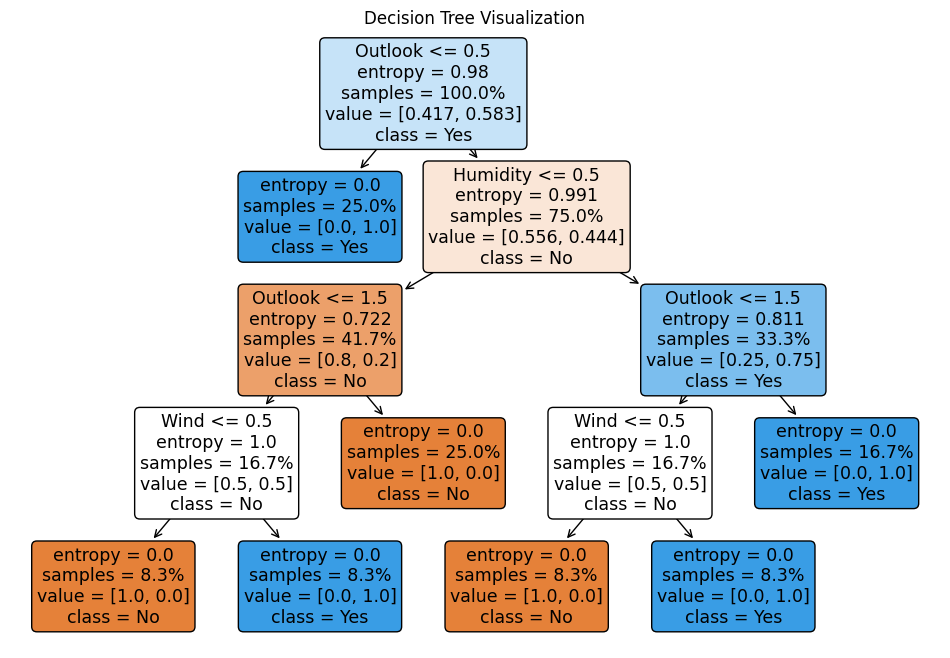

In [16]:
plt.figure(figsize=(12, 8))
plot_tree(reg, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True, proportion=True)
plt.title("Decision Tree Visualization")
plt.show()

###Task# 3

a. Read data from: https://raw.githubusercontent.com/datawizardsai/Data-Science/master/cancer.csv

b. Predict whether the cancer is malignant or benign using the Decision tree model

c. Calculate the Accuracy

d. Calculate the confusion matrix


In [18]:
cancer = pd.read_csv('https://raw.githubusercontent.com/datawizardsai/Data-Science/master/cancer.csv')
cancer.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
X = cancer.drop('diagnosis',axis=1)
y = cancer['diagnosis']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
clf = DecisionTreeClassifier(criterion='entropy')
reg2 = clf.fit(X_train, y_train)

In [22]:
y_pred = reg2.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9298245614035088


In [24]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.93      0.94        67
           M       0.90      0.94      0.92        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



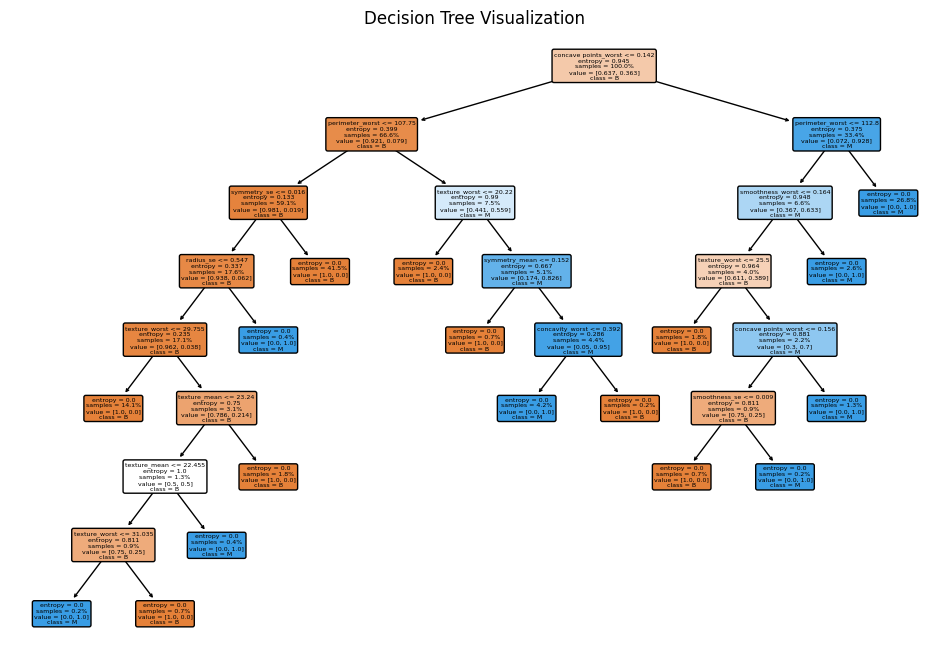

In [25]:
plt.figure(figsize=(12, 8))
plot_tree(reg2, filled=True, feature_names=X.columns, class_names=['B', 'M'], rounded=True, proportion=True)
plt.title("Decision Tree Visualization")
plt.show()

#Multi-Class Classification

###Task# 4

a. Load iris dataset.

b. Define X and y and split the data into test/train.

c. Train a decision tree model.

d. Evaluate using confusion matrix.

e. Visualize the tree.

In [26]:
iris = pd.read_csv('https://raw.githubusercontent.com/datawizardsai/Data-Science/master/iris.csv')
iris.head(5)

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
X = iris.drop('Class', axis=1)
y = iris['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
model = DecisionTreeClassifier(criterion='gini')
reg3 = model.fit(X_train, y_train)

In [29]:
y_pred = reg3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [30]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



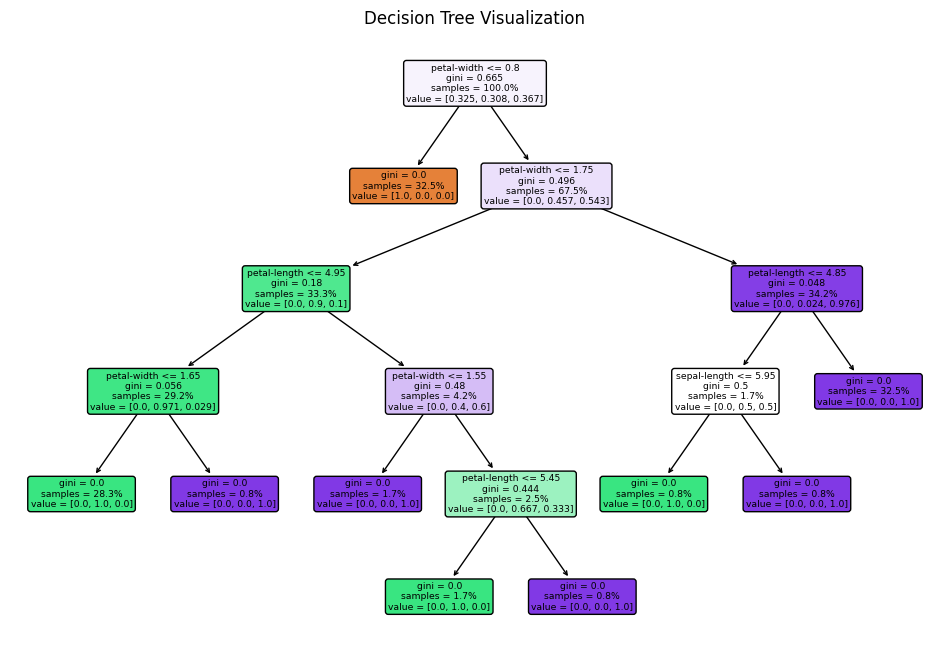

In [31]:
plt.figure(figsize=(12, 8))
plot_tree(reg3, filled=True, feature_names=X.columns, rounded=True, proportion=True)
plt.title("Decision Tree Visualization")
plt.show()